In [79]:
import pandas as pd
from collections import defaultdict
from itertools import chain, combinations

def def_value():
    return 0

### Q2: Test Case 2

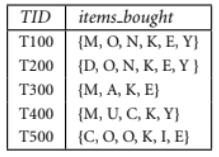



In [80]:
data = {
    'T100': {'M', 'O', 'N', 'K', 'E', 'Y'},
    'T200': {'D', 'O', 'N', 'K', 'E', 'Y'},
    'T300': {'M', 'A', 'K', 'E'},
    'T400': {'M', 'U', 'C', 'K', 'Y'},
    'T500': {'C', 'O', 'O', 'K', 'I', 'E'},
}

n = 5
support_threshold = 0.6 
confidence_threshold = 0.8
support_val = 3
confidence_val = 4

In [81]:
def generate_candidate_set1():
  count = defaultdict(def_value)
  for row in data.keys():
    for item in data[row]:
      count[tuple([item])] += 1

  for item in list(count.keys()):
    if count[item]/n < support_threshold:
      del count[item]

  dict(count)
  return count

In [82]:
def generate_candidate_setk(lk_prev, k):
  new_pairs = defaultdict(def_value)
  prev_itemsets = list(lk_prev.keys())
  for i in range(len(prev_itemsets)):
    for j in range(i+1,len(prev_itemsets)):
      new_tuple = prev_itemsets[i] + prev_itemsets[j]
      new_tuple = tuple(sorted(list(set(new_tuple))))
      if len(new_tuple) != k:
        continue
      new_pairs[new_tuple] = 0
  
  ck = new_pairs
  for pairs in ck.keys():
    for row in data.keys():
      flag = 0
      for item in pairs:
        if item not in data[row]:
          flag = 1
          break
      if flag == 0:
        ck[pairs] += 1
  return ck

In [83]:
def generate_lk(ck):
  for pairs in list(ck.keys()):
    if ck[pairs]/n < support_threshold:
      del ck[pairs]
  return ck

In [84]:
def print_lks(lks):
  print('Frequent itemsets are:')
  for i in range(len(lks)):
    print('L'+str(i+1),':')
    for key in lks[i].keys():
      print(key,':',lks[i][key])
    print('')

In [85]:
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def get_rules_itemset(itemset, freq, confidence):
  rules = []
  for subset in list(powerset(itemset)):
    subset = set(subset)
    if len(subset)>0 and len(subset) != len(list(itemset)):
      count = 0
      for row in data.keys():
        flag = True
        for item in list(subset):
          if item not in data[row]:
            flag = False
            break
        if flag:
          count += 1
      cal_conf = freq / count
      if cal_conf >= confidence:
        rules.append([set(subset),set(itemset)-set(subset),cal_conf])
  return rules

In [86]:
i = 1
lk = defaultdict()
lks = []
while(1):
  if i==1: 
    ck = generate_candidate_set1()
  else:
    if len(lk)>1:
      ck = generate_candidate_setk(lk, i)
    else:
      break
  lk = generate_lk(ck)
  lks.append(dict(lk))
  i += 1

In [87]:
print_lks(lks)

Frequent itemsets are:
L1 :
('K',) : 5
('O',) : 3
('Y',) : 3
('M',) : 3
('E',) : 4

L2 :
('K', 'O') : 3
('K', 'Y') : 3
('K', 'M') : 3
('E', 'K') : 4
('E', 'O') : 3

L3 :
('E', 'K', 'O') : 3



In [88]:
association_rules = []
for lk in lks:
  for itemset in lk.keys():
    if len(itemset)>1:
      association_rules.extend(get_rules_itemset(itemset, lk[itemset], confidence_threshold))

print('Association rules which satisfy threshold confidence')
for rule in association_rules:
  print(rule[0],'=> ',rule[1], rule[2])

print('\nTotal no. of associations:',len(association_rules))

Association rules which satisfy threshold confidence
{'O'} =>  {'K'} 1.0
{'Y'} =>  {'K'} 1.0
{'M'} =>  {'K'} 1.0
{'E'} =>  {'K'} 1.0
{'K'} =>  {'E'} 0.8
{'O'} =>  {'E'} 1.0
{'O'} =>  {'K', 'E'} 1.0
{'O', 'E'} =>  {'K'} 1.0
{'K', 'O'} =>  {'E'} 1.0

Total no. of associations: 9


In [89]:
#Varying the support and confidence thresholds
n = 5
support_threshold = 0.8 
confidence_threshold = 0.6
support_val = 4
confidence_val = 3

i = 1
lk = defaultdict()
lks = []
while(1):
  if i==1: 
    ck = generate_candidate_set1()
  else:
    if len(lk)>1:
      ck = generate_candidate_setk(lk, i)
    else:
      break
  lk = generate_lk(ck)
  lks.append(dict(lk))
  i += 1

print_lks(lks)

association_rules = []
for lk in lks:
  for itemset in lk.keys():
    if len(itemset)>1:
      association_rules.extend(get_rules_itemset(itemset, lk[itemset], confidence_threshold))

print('Association rules which satisfy threshold confidence')
for rule in association_rules:
  print(rule[0],'=> ',rule[1], rule[2])

print('\nTotal no. of associations:',len(association_rules))

Frequent itemsets are:
L1 :
('K',) : 5
('E',) : 4

L2 :
('E', 'K') : 4

Association rules which satisfy threshold confidence
{'E'} =>  {'K'} 1.0
{'K'} =>  {'E'} 0.8

Total no. of associations: 2


### Q1. Test case 1

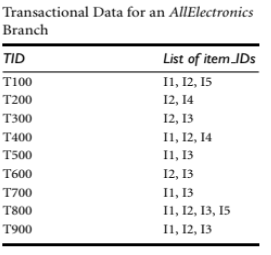

In [90]:
data = {
    'T100': {'I1', 'I2', 'I5'},
    'T200': {'I2', 'I4'},
    'T300': {'I2', 'I3'},
    'T400': {'I1', 'I2', 'I4'},
    'T500': {'I1', 'I3'},
    'T600': {'I2', 'I3'},
    'T700': {'I1', 'I3'},
    'T800': {'I1', 'I2', 'I3', 'I5'},
    'T900': {'I1', 'I2', 'I3'},
}

n = 9
support_threshold = 2/9
confidence_threshold = 0.7
support_val = 2

In [91]:
i = 1
lk = defaultdict()
lks = []
while(1):
  if i==1: 
    ck = generate_candidate_set1()
  else:
    if len(lk)>1:
      ck = generate_candidate_setk(lk, i)
    else:
      break
  lk = generate_lk(ck)
  lks.append(dict(lk))
  i += 1

In [92]:
print_lks(lks)

Frequent itemsets are:
L1 :
('I2',) : 7
('I5',) : 2
('I1',) : 6
('I4',) : 2
('I3',) : 6

L2 :
('I2', 'I5') : 2
('I1', 'I2') : 4
('I2', 'I4') : 2
('I2', 'I3') : 4
('I1', 'I5') : 2
('I1', 'I3') : 4

L3 :
('I1', 'I2', 'I5') : 2
('I1', 'I2', 'I3') : 2

L4 :



In [93]:
association_rules = []
for lk in lks:
  for itemset in lk.keys():
    if len(itemset)>1:
      association_rules.extend(get_rules_itemset(itemset, lk[itemset], confidence_threshold))

print('Association rules which satisfy threshold confidence')
for rule in association_rules:
  print(rule[0],'=> ',rule[1], rule[2])

print('\nTotal no. of associations:',len(association_rules))

Association rules which satisfy threshold confidence
{'I5'} =>  {'I2'} 1.0
{'I4'} =>  {'I2'} 1.0
{'I5'} =>  {'I1'} 1.0
{'I5'} =>  {'I2', 'I1'} 1.0
{'I5', 'I1'} =>  {'I2'} 1.0
{'I2', 'I5'} =>  {'I1'} 1.0

Total no. of associations: 6


In [94]:
#Varying the support and confidence thresholds
n = 9
support_threshold = 3/9
confidence_threshold = 0.5
support_val = 3

i = 1
lk = defaultdict()
lks = []
while(1):
  if i==1: 
    ck = generate_candidate_set1()
  else:
    if len(lk)>1:
      ck = generate_candidate_setk(lk, i)
    else:
      break
  lk = generate_lk(ck)
  lks.append(dict(lk))
  i += 1

print_lks(lks)

association_rules = []
for lk in lks:
  for itemset in lk.keys():
    if len(itemset)>1:
      association_rules.extend(get_rules_itemset(itemset, lk[itemset], confidence_threshold))

print('Association rules which satisfy threshold confidence')
for rule in association_rules:
  print(rule[0],'=> ',rule[1], rule[2])

print('\nTotal no. of associations:',len(association_rules))

Frequent itemsets are:
L1 :
('I2',) : 7
('I1',) : 6
('I3',) : 6

L2 :
('I1', 'I2') : 4
('I2', 'I3') : 4
('I1', 'I3') : 4

L3 :

Association rules which satisfy threshold confidence
{'I1'} =>  {'I2'} 0.6666666666666666
{'I2'} =>  {'I1'} 0.5714285714285714
{'I2'} =>  {'I3'} 0.5714285714285714
{'I3'} =>  {'I2'} 0.6666666666666666
{'I1'} =>  {'I3'} 0.6666666666666666
{'I3'} =>  {'I1'} 0.6666666666666666

Total no. of associations: 6


### Q3. SPECT Data (First 20 rows and 5 columns)

In [95]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train'

--2023-02-08 06:34:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECT.train
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3758 (3.7K) [application/x-httpd-php]
Saving to: ‘SPECT.train.3’

SPECT.train.3       100%[===================>]   3.67K  --.-KB/s    in 0s      

2023-02-08 06:34:58 (267 MB/s) - ‘SPECT.train.3’ saved [3758/3758]



In [96]:
df = pd.read_csv('SPECT.train',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
77,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78,0,0,0,1,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,1


In [97]:
data = {}
for i in range(20):
  data['T'+str(i+1)] = set()

for i in range(20):
  for j in range(1,6):
     if df.iloc[i][j]==1:
       data['T'+str(i+1)].add('C'+str(j))

for key in data.keys():
  print(key,':',data[key])


n = 20
support_threshold = 0.6
confidence_threshold = 0.7
support_val = 12

T1 : {'C4'}
T2 : {'C4', 'C3'}
T3 : {'C1', 'C5', 'C3'}
T4 : set()
T5 : set()
T6 : {'C4'}
T7 : {'C1', 'C4', 'C3'}
T8 : {'C3'}
T9 : {'C3'}
T10 : {'C2'}
T11 : {'C1', 'C5', 'C2'}
T12 : {'C1', 'C5', 'C2'}
T13 : {'C1', 'C5'}
T14 : {'C2'}
T15 : {'C1', 'C4', 'C3'}
T16 : {'C2', 'C3'}
T17 : {'C4', 'C3'}
T18 : set()
T19 : {'C1', 'C5', 'C3'}
T20 : {'C1', 'C5'}


In [98]:
i = 1
lk = defaultdict()
lks = []
while(1):
  if i==1: 
    ck = generate_candidate_set1()
  else:
    if len(lk)>1:
      ck = generate_candidate_set1(lk, i)
    else:
      break
  lk = generate_lk(ck)
  lks.append(dict(lk))
  i += 1

In [99]:
print_lks(lks)

Frequent itemsets are:
L1 :



In [100]:
association_rules = []
for lk in lks:
  for itemset in lk.keys():
    if len(itemset)>1:
      association_rules.extend(get_rules_itemset(itemset, lk[itemset], confidence_threshold))

print('Association rules which satisfy threshold confidence')
for rule in association_rules:
  print(rule[0],'=> ',rule[1], rule[2])

print('\nTotal no. of associations:',len(association_rules))

Association rules which satisfy threshold confidence

Total no. of associations: 0


In [101]:
#Varying the support and confidence thresholds
n = 20
support_threshold = 0.2
confidence_threshold = 0.5
support_val = 4

i = 1
lk = defaultdict()
lks = []
while(1):
  if i==1: 
    ck = generate_candidate_set1()
  else:
    if len(lk)>1:
      ck = generate_candidate_setk(lk, i)
    else:
      break
  lk = generate_lk(ck)
  lks.append(dict(lk))
  i += 1

print_lks(lks)

association_rules = []
for lk in lks:
  for itemset in lk.keys():
    if len(itemset)>1:
      association_rules.extend(get_rules_itemset(itemset, lk[itemset], confidence_threshold))

print('Association rules which satisfy threshold confidence')
for rule in association_rules:
  print(rule[0],'=> ',rule[1], rule[2])

print('\nTotal no. of associations:',len(association_rules))

Frequent itemsets are:
L1 :
('C4',) : 6
('C3',) : 9
('C1',) : 8
('C5',) : 6
('C2',) : 5

L2 :
('C3', 'C4') : 4
('C1', 'C3') : 4
('C1', 'C5') : 6

L3 :

Association rules which satisfy threshold confidence
{'C4'} =>  {'C3'} 0.6666666666666666
{'C1'} =>  {'C3'} 0.5
{'C1'} =>  {'C5'} 0.75
{'C5'} =>  {'C1'} 1.0

Total no. of associations: 4
